<a href="https://colab.research.google.com/github/RezaMathers/machine-learning-practice/blob/main/scikit_learn_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Scikit-Learn Classification Workflow
### 1. Getting the data ready

In [58]:
import plotly.express as px
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from joblib import dump, load

In [2]:
# Get the data
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Set random seed
np.random.seed(23)

# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 2. Preparing a machine learning model, fitting it and making predictions

In [6]:
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Make predictions and save as variable
y_preds = clf.predict(X_test)

### 3. Evaluate the model's predictions

In [7]:
# Score on training set: should be 100%
clf.score(X_train, y_train)

1.0

In [8]:
# Score on test set
clf.score(X_test, y_test)

0.8032786885245902

### 4. Experimenting with different Classification models
See if you get better results

In [9]:
# Create a dictionary called models containing all the classifiers imported
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "LinearSVC": LinearSVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Empty dictionary for the scores
results = {}

# Loop through the dictionaries to get scores (all have the same score metric)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'KNeighborsClassifier': 0.7049180327868853,
 'LinearSVC': 0.819672131147541,
 'LogisticRegression': 0.819672131147541,
 'RandomForestClassifier': 0.8032786885245902,
 'SVC': 0.7213114754098361}

In [10]:
# Visulaize the results
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])
px.bar(results_df, x=results_df.index, y="Accuracy", 
       width=1000, height=400, color=results_df.index)

### 5. Hyperparameter Tuning
Logistic Regression and LinearSVC had the best score. Try improving LogisticRegression using `RandomizedSearchCV`

In [11]:
# View the hyperparameters of the LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
# Try tuning 'C' and 'solver'
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ["liblinear"]}

# Use RandomizedSearchCV to search for best combination of the hyperparameters
np.random.seed(23)

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=5)
# Fit this instance
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.646 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.646 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 1/5] END C=1.623776739188721, solver=liblinear;, score=0.898 total time=   0.0s
[CV 2/5] END C=1.623776739188721, solver=liblinear;, score=0.857 total time=   0.0s
[CV 3/5] END C=1.623776739188721, solver=liblinear;, score=0.812 total time=   0.0s
[CV 4/5] END C=1.623776739188721, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END C=1.623776739188721, solver=liblinear;, score=0.896 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END C=0.0006951927

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [13]:
# Best hyperparameters from the run
bp = rs_log_reg.best_params_
bp

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [14]:
# Score
rs_log_reg.score(X_test, y_test)

0.8524590163934426

##### Note: score always gives the `accuracy` metric for classifiers

### 6. Evaluating a model
#### When it comes to classification, you'll likely want to use a few more evaluation metrics, including:

  * Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
  * Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
  * Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
  *Recall - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
  * F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
  * Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
  * ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
  * Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

In [15]:
# Instantiate a LogisticRegression classifier using the best_params achieved
clf = LogisticRegression(C=bp['C'],
                         solver=bp['solver'])

# Fit onto training data
clf.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [16]:
# recheck score
clf.score(X_test, y_test)

0.8524590163934426

In [17]:
# New predictions
y_preds = clf.predict(X_test)

In [18]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[25,  5],
       [ 4, 27]])

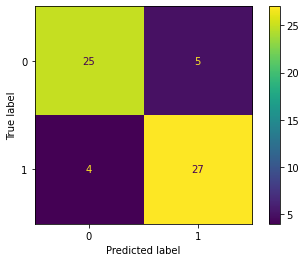

In [19]:
# more visual confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

In [20]:
# Create a classification report
classification_report(y_true=y_test,
                      y_pred=y_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.85        30\n           1       0.84      0.87      0.86        31\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

 * Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
 * Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
 * F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
 * Support - The number of samples each metric was calculated on.
 * Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
 * Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
 * Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


In [21]:
cls_report = pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))
cls_report

,0,1,accuracy,macro avg,weighted avg
precision,0.862069,0.843750,0.852459,0.852909,0.852759
recall,0.833333,0.870968,0.852459,0.852151,0.852459
f1-score,0.847458,0.857143,0.852459,0.852300,0.852380
support,30.000000,31.000000,0.852459,61.000000,61.000000


In [22]:
# Precision score
precision_score(y_test, y_preds)

0.84375

In [23]:
# recall score
recall_score(y_test, y_preds)

0.8709677419354839

In [24]:
# F1 score
f1_score(y_test, y_preds)

0.8571428571428571


Plot ROC curve: true positive rate vs false positive rate


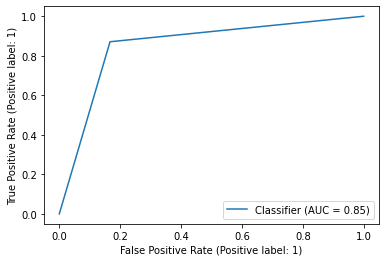

In [25]:
# From predictions 
RocCurveDisplay.from_predictions(y_test, y_preds);

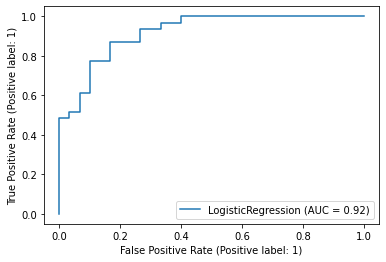

In [26]:
# From classifier
RocCurveDisplay.from_estimator(clf, X_test, y_test);

##### Cross-val score

In [27]:
# Default returns 5 values (cv=5)
cross_val_score(clf, X, y, scoring="accuracy", cv=5)

array([0.81967213, 0.85245902, 0.85245902, 0.85      , 0.71666667])

In [28]:
# mean of the array gives one value for the cross_validated scoring metric
cross_val_acc = np.mean(cross_val_score(clf, X, y, scoring="accuracy", cv=5))
cross_val_acc

0.8182513661202186

In [29]:
# cv precision 
cross_val_prec = np.mean(cross_val_score(clf, X, y, 
                                         scoring="precision", cv=5))
cross_val_prec

0.8122549019607843

In [30]:
# cv recall 
cross_val_rec = np.mean(cross_val_score(clf, X, y, 
                                         scoring="recall", cv=5))
cross_val_rec

0.8727272727272727

In [31]:
# cv 1 
cross_val_f1 = np.mean(cross_val_score(clf, X, y, 
                                         scoring="f1", cv=5))
cross_val_f1

0.8404818247075424

### 7. Exporting and Importing a trained model

In [32]:
dump(clf, filename="trained_heart_disease_classifier.joblib")

['trained_heart_disease_classifier.joblib']

In [33]:
loaded_model = load(filename="trained_heart_disease_classifier.joblib")

# evaluate trained model on test data
loaded_model.score(X_test, y_test)

0.8524590163934426





## Scikit-learn Regression Practice
### 1. Getting the data ready

In [34]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [36]:
# Find number of missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Find the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

#### Note: all the data must be numerical or the regressors will not work

In [38]:
# Remove rows with no labels (NaN's in the Price column)
car_sales.dropna(subset=['Price'], inplace=True)

In [39]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  902 non-null    float64
 3   Doors          903 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


### 2. Building a Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#### Define features as categorical or otherwise and make all numerical

In [41]:
# Define categorical features and create transformer Pipeline
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
      ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Define door features: special category, fill missing with 4 and all are no's 
# ..then create transformer Pipeline
door_feature = ["Doors"]

door_transformer = Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

# Define numeric feature and create transformer Pipeline
# ..only to fill missing values (strategy="Median")
numeric_feature = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="median"))
])

In [42]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
                  ("cat", categorical_transformer, categorical_features),
                  ("door", door_transformer, door_feature),
                  ("num", numeric_transformer, numeric_feature)
    ]
)

In [43]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#### To test all these models, we'll create a dictionary of regression models and an empty dictionary for regression model results.


In [44]:
# Dictionary of instantiated models
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel='rbf'),
                     "RandomForestRegressor": RandomForestRegressor()}
regression_results = {}

In [45]:
# Split data into X and y
car_sales_X = car_sales.drop("Price", axis=1)
car_sales_y = car_sales["Price"]

# Split into train and test sets; add random_state of 42 for reproducibility
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(
                                                      car_sales_X,
                                                      car_sales_y,
                                                      test_size=0.2,
                                                      random_state=42
)

# Check the shapes of the training and test datasets
car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

#### Create a loop that will:
 * Go through the `regression_models` dicitonary
 * Create a `Pipeline` which contains the `preprocessor` and one of the models in the dictionary
 * Fit the `Pipeline` to the car_sales training data
 * Evaluate each model on the car_sales test data and appends the results to the `regression_results` dictionary

In [46]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    # Create a model Pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("model", model)]) 
    
    # Fit the model Pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)

    # Score the model Pipeline on the test data
    # ..and append results to the empty dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test,
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [47]:
# Now all models are fitted. Check the results of each model by
# ...printing the regression_results dictionary
regression_results

{'RandomForestRegressor': 0.2025530459111078,
 'Ridge': 0.25402611057943936,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755}

#### Best modeel is the Ridge Regressor 

For regression models, the `score()` methods gives the result of R-squared or coefficient of determination

Results on the `Ridge` model could be improved by hyperparameter tuning. Check all its metrics then tune

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [49]:
# Since the models check true labels vs predictions, make predictions
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and
# Ridge() as the "model"
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the car sales training data
ridge_pipeline.fit(car_X_train, car_y_train)

# Make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

# View the first 50 predictions
car_y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

In [61]:
# fn to make predicitions on the regression model and get metrics for the data
def pred_n_metrx(mdl):
    preds = mdl.predict(car_X_test)
    mse = mean_squared_error(car_y_test, preds)
    mae = mean_absolute_error(car_y_test, preds)
    r2 = r2_score(car_y_test, preds)
    print(f"First 10 predictions: {preds[:10]}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-Squared: {r2}")

In [62]:
pred_n_metrx(ridge_pipeline)

First 10 predictions: [18514.480873   22204.86580267 11045.72092225  6891.87687957
  8793.93970278 10926.96786577 15267.76229871 13834.80312146
 20207.44377898 14412.59968701]
Mean Absolute Error: 5713.8215208551555
Mean Squared Error: 49950182.63337456
R-Squared: 0.25402611057943936


In [50]:
# Mean Squared Error MSE
mse = mean_squared_error(car_y_test, car_y_preds)
mse

49950182.63337456

In [51]:
# Mean Absolute Error MAE
mae = mean_absolute_error(car_y_test, car_y_preds)
mae

5713.8215208551555

In [52]:
# R-squared/coefficient of determination
r2 = r2_score(car_y_test, car_y_preds)
r2

0.25402611057943936

### 3. Hyperparamter tuning

In [54]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [66]:
# RidgeCV does the regression while tuning the parameters
ridgecv_pipeline = Pipeline(steps=[
                              ("preprocessor", preprocessor),
                              ("model", RidgeCV(alphas=np.arange(0.01,10,0.01,),
                                                scoring='neg_mean_absolute_error'))])

ridgecv_pipeline.fit(car_X_train, car_y_train)

# Make predictions and calculate metrics
pred_n_metrx(ridgecv_pipeline)

First 10 predictions: [18509.31757086 22155.37487351 11120.35542483  7219.96038595
  8828.0289163  10926.63420618 15466.05286151 14168.41121075
 20310.98901136 14470.41575242]
Mean Absolute Error: 5710.450971684789
Mean Squared Error: 49834536.22515292
R-Squared: 0.25575321539448703


#### Note: since the results are pretty similar, the Ridge regression did well.

### 4. Export trained model

In [67]:
dump(ridge_pipeline, filename="ridge_regressor_car_sales.joblib")

['ridge_regressor_car_sales.joblib']

In [68]:
loaded_reg = load("ridge_regressor_car_sales.joblib")

# evaluate the model
pred_n_metrx(loaded_reg)

First 10 predictions: [18514.480873   22204.86580267 11045.72092225  6891.87687957
  8793.93970278 10926.96786577 15267.76229871 13834.80312146
 20207.44377898 14412.59968701]
Mean Absolute Error: 5713.8215208551555
Mean Squared Error: 49950182.63337456
R-Squared: 0.25402611057943936
